In [1]:
!ls csvFiles
!ls csvFiles/actualLabelsPredictionDL/
!ls csvFiles/labelsReplacedByDominantValue/

actualLabelsPredictionDL  labelsReplacedByDominantValue
bf_result.csv  emp_result.csv  fc_result.csv  msl_result.csv  msw_result.csv
BF_Adv_CC_WorkingFile_method1.csv
BF_Adv_CC_WorkingFile_method3.csv
BF_Int_CC_WorkingFile_method1.csv
BF_Int_CC_WorkingFile_method3.csv
BF_Rud_CC_WorkingFile_method1.csv
BF_Rud_CC_WorkingFile_method3.csv
EMP_AL_CC_WorkingFile_method1.csv
EMP_AL_CC_WorkingFile_method3.csv
EMP_NAL_CC_WorkingFile_method1.csv
EMP_NAL_CC_WorkingFile_method3.csv
EMP_NAL_CC_WorkingFile_method3_DoubtfulCasesRegressedData.tsv
EMP_NAL_CC_WorkingFile_method3_RegressionLine.csv
EMP_NAL_CC_WorkingFile_method3_RegressionLine_DoubtfulCasesRegressedData.tsv
EMP_NAL_CC_WorkingFile_method3_results
EMP_UN_CC_WorkingFile_method1.csv
EMP_UN_CC_WorkingFile_method3.csv
FC_Adv_CC_WorkingFile_method1.csv
FC_Adv_CC_WorkingFile_method3.csv
FC_Int_CC_WorkingFile_method1.csv
FC_Int_CC_WorkingFile_method3.csv
FC_Rud_CC_WorkingFile_method1.csv
FC_Rud_CC_WorkingFile_method3.csv
MSL_Adv_CC_WorkingFile_me

# Task for this notebook
1. Take out list of doubtful cases for each indicator from CSV files of "csvFiles/actualLabelsPredictionDL", Doubtful cases means even one negative movement.
2. For each csv file in "csvFiles/labelsReplacedByDominantValue", Filter out the doubtful villages row for that CSV file
3. For each of this doubtful village, do a regression analysis and then print out the count of slopes being positive, negative or zero for each csv file
4. Do a plot of residuals for all the slope values that exist for these doubtful villages

## Import the required packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats
import time
import os
from os import listdir
from os.path import isfile,join
from matplotlib import pyplot as mp

## Take out list of doubtful cases village Ids from each csv file

In [3]:
actualPredictionLabelsFolder = 'csvFiles/actualLabelsPredictionDL/'
actualPredictionCsvFiles = [f for f in listdir(actualPredictionLabelsFolder) if (isfile(join(actualPredictionLabelsFolder, f)) and f.endswith('.csv')) ]

In [4]:
doubtfulVillagesDictionary = {}
for currentCsvLabelFile in actualPredictionCsvFiles:
    print('*'*25)
    #currentCsvLabelFile = actualPredictionCsvFiles[0]
    currentCsvLabelFileFullPath = actualPredictionLabelsFolder + currentCsvLabelFile
    print('currentCsvLabelFile :: ',currentCsvLabelFile)
    print('currentCsvLabelFileFullPath :: ',currentCsvLabelFileFullPath)
    df = pd.read_csv(currentCsvLabelFileFullPath)
    print('df.shape',df.shape)
    # print(df.head())
    doubtfulDf = df[df['negative_count']>0]
    print('doubtfulDf.shape',doubtfulDf.shape)
    doubtfulVillageIds= doubtfulDf['Town/Village'].values
    doubtfulVillageIds=doubtfulVillageIds.tolist()
    print('numberOfDoubtfulVillages',len(doubtfulVillageIds))
    underscoreStartIndex = currentCsvLabelFile.find('_')
    currentIndicatorKey = currentCsvLabelFile[:underscoreStartIndex].upper()
    print('currentIndicatorKey',currentIndicatorKey)
    doubtfulVillagesDictionary[currentIndicatorKey]=doubtfulVillageIds

*************************
currentCsvLabelFile ::  msw_result.csv
currentCsvLabelFileFullPath ::  csvFiles/actualLabelsPredictionDL/msw_result.csv
df.shape (134977, 18)
doubtfulDf.shape (62154, 18)
numberOfDoubtfulVillages 62154
currentIndicatorKey MSW
*************************
currentCsvLabelFile ::  bf_result.csv
currentCsvLabelFileFullPath ::  csvFiles/actualLabelsPredictionDL/bf_result.csv
df.shape (134977, 18)
doubtfulDf.shape (33514, 18)
numberOfDoubtfulVillages 33514
currentIndicatorKey BF
*************************
currentCsvLabelFile ::  fc_result.csv
currentCsvLabelFileFullPath ::  csvFiles/actualLabelsPredictionDL/fc_result.csv
df.shape (134977, 18)
doubtfulDf.shape (38170, 18)
numberOfDoubtfulVillages 38170
currentIndicatorKey FC
*************************
currentCsvLabelFile ::  emp_result.csv
currentCsvLabelFileFullPath ::  csvFiles/actualLabelsPredictionDL/emp_result.csv
df.shape (133439, 18)
doubtfulDf.shape (50944, 18)
numberOfDoubtfulVillages 50944
currentIndicatorKey EM

## Do a regression analysis and a plot of residuals on each of the doubtful cases

==================== currentCsvFile::  EMP_NAL_CC_WorkingFile_method3.csv ====================
currentIndicatorKey EMP
doubtful villages in Dictionary 50944
doubtfulVillagesDf.shape (50944, 11)
========== Info ==========
Total Villages:  50944
Positive Slope:  26762
Negative Slope:  22640
No Change, Zero Slope:  1542
percentageOfNegativeSlopePointsOverall :  16.966554005950286 %
max Slope value is : 5.949788715566837
min Slope value is : -5.982234918681124


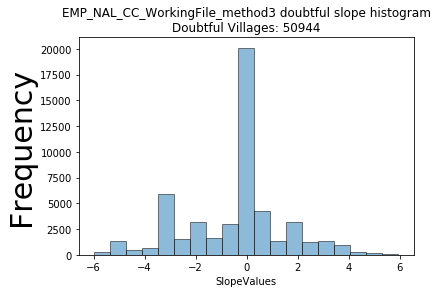

/home/satbigvm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


<Figure size 432x288 with 0 Axes>

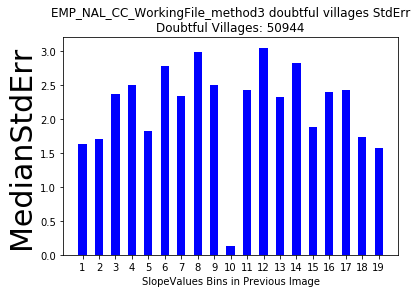

==================== currentCsvFile::  EMP_NAL_CC_WorkingFile_method3_RegressionLine.csv ====================
currentIndicatorKey EMP
doubtful villages in Dictionary 50944
doubtfulVillagesDf.shape (50944, 16)
========== Info ==========
Total Villages:  50944
Positive Slope:  slope    26762
slope    26762
dtype: int64
Negative Slope:  slope    22640
slope    22640
dtype: int64
No Change, Zero Slope:  slope    1542
slope    1542
dtype: int64
percentageOfNegativeSlopePointsOverall :  slope    16.966554
slope    16.966554
dtype: float64 %
max Slope value is : 5.949788715566838
min Slope value is : -5.982234918681124


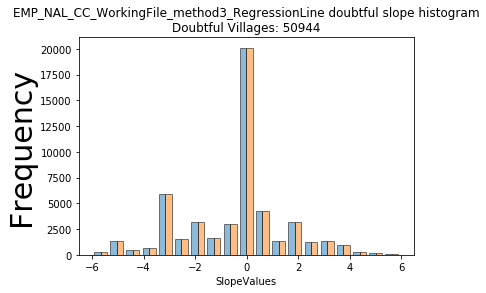

<Figure size 432x288 with 0 Axes>

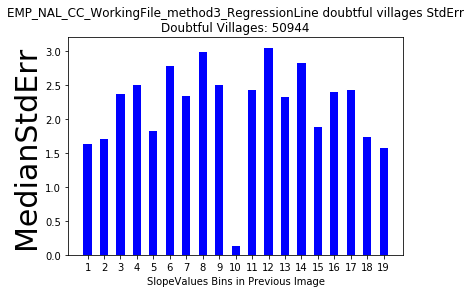

==================== currentCsvFile::  EMP_UN_CC_WorkingFile_method3.csv ====================
currentIndicatorKey EMP
doubtful villages in Dictionary 50944
doubtfulVillagesDf.shape (50944, 11)
========== Info ==========
Total Villages:  50944
Positive Slope:  30833
Negative Slope:  17792
No Change, Zero Slope:  2319
percentageOfNegativeSlopePointsOverall :  13.33343325414609 %
max Slope value is : 6.118934732125191
min Slope value is : -5.9184579711588015


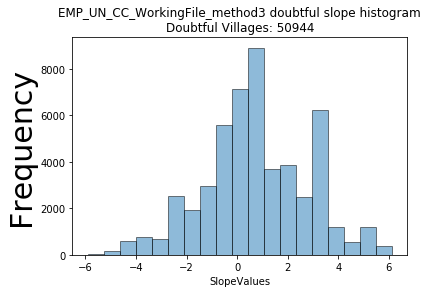

<Figure size 432x288 with 0 Axes>

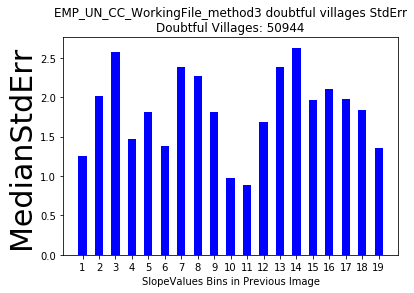

==================== currentCsvFile::  MSW_Adv_CC_WorkingFile_method1.csv ====================
currentIndicatorKey MSW
doubtful villages in Dictionary 62154
doubtfulVillagesDf.shape (62154, 11)
========== Info ==========
Total Villages:  62154
Positive Slope:  26511
Negative Slope:  34204
No Change, Zero Slope:  1439
percentageOfNegativeSlopePointsOverall :  25.340613586018357 %
max Slope value is : 20.22061876197868
min Slope value is : -20.23613790619416


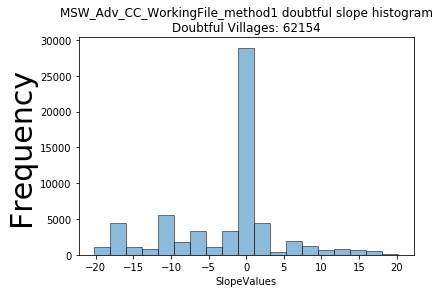

<Figure size 432x288 with 0 Axes>

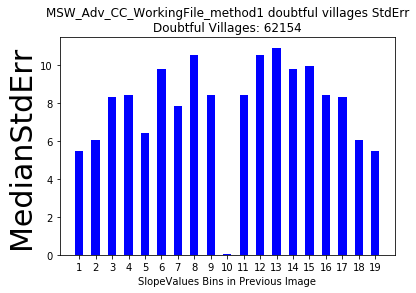

==================== currentCsvFile::  FC_Adv_CC_WorkingFile_method3.csv ====================
currentIndicatorKey FC
doubtful villages in Dictionary 38170
doubtfulVillagesDf.shape (38170, 11)
========== Info ==========
Total Villages:  38170
Positive Slope:  15341
Negative Slope:  21547
No Change, Zero Slope:  1282
percentageOfNegativeSlopePointsOverall :  15.963460441408536 %
max Slope value is : 12.786247042934093
min Slope value is : -12.829221334194301


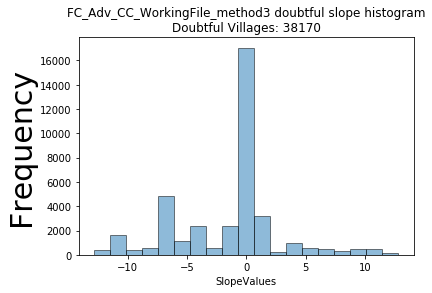

<Figure size 432x288 with 0 Axes>

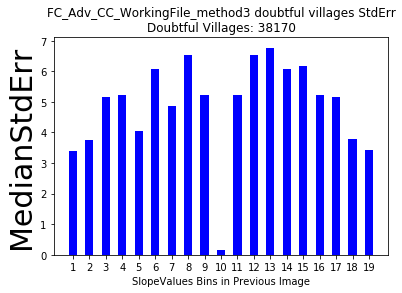

==================== currentCsvFile::  FC_Int_CC_WorkingFile_method1.csv ====================
currentIndicatorKey FC
doubtful villages in Dictionary 38170
doubtfulVillagesDf.shape (38170, 11)
========== Info ==========
Total Villages:  38170
Positive Slope:  16764
Negative Slope:  20221
No Change, Zero Slope:  1185
percentageOfNegativeSlopePointsOverall :  14.981070849107624 %
max Slope value is : 18.321426438855312
min Slope value is : -18.45714674980076


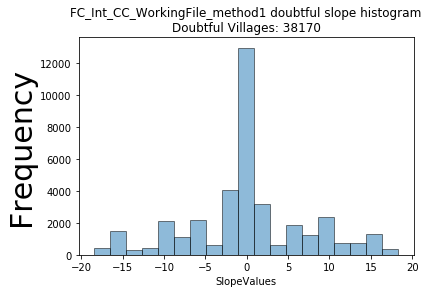

<Figure size 432x288 with 0 Axes>

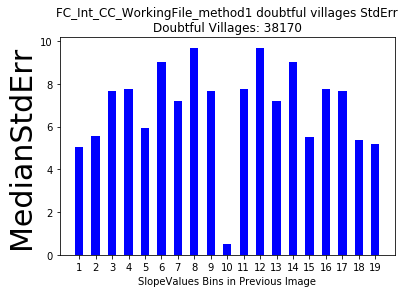

==================== currentCsvFile::  BF_Adv_CC_WorkingFile_method3.csv ====================
currentIndicatorKey BF
doubtful villages in Dictionary 33514
doubtfulVillagesDf.shape (33514, 11)
========== Info ==========
Total Villages:  33514
Positive Slope:  10380
Negative Slope:  21905
No Change, Zero Slope:  1229
percentageOfNegativeSlopePointsOverall :  16.228690813990532 %
max Slope value is : 13.179661017283015
min Slope value is : -13.180956972993952


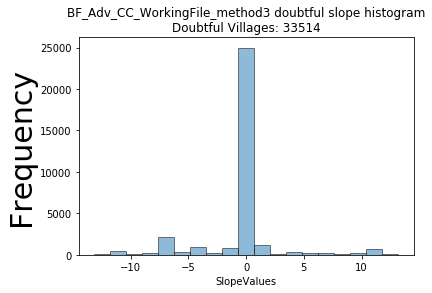

<Figure size 432x288 with 0 Axes>

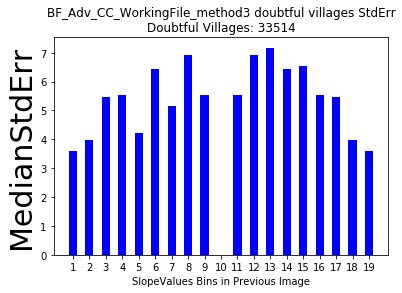

==================== currentCsvFile::  BF_Rud_CC_WorkingFile_method1.csv ====================
currentIndicatorKey BF
doubtful villages in Dictionary 33514
doubtfulVillagesDf.shape (33514, 11)
========== Info ==========
Total Villages:  33514
Positive Slope:  21377
Negative Slope:  10768
No Change, Zero Slope:  1369
percentageOfNegativeSlopePointsOverall :  7.977655452410411 %
max Slope value is : 15.810551888327618
min Slope value is : -15.786001508174014


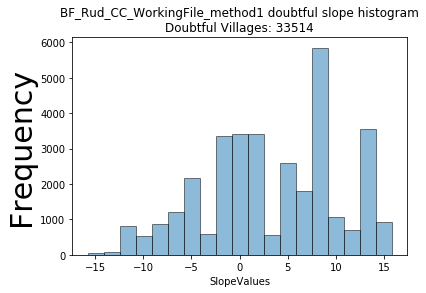

<Figure size 432x288 with 0 Axes>

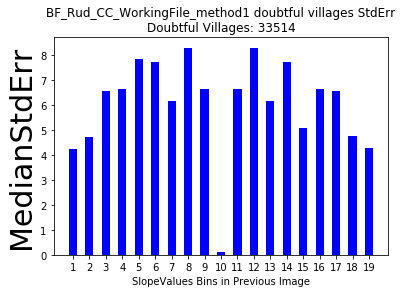

==================== currentCsvFile::  MSL_Adv_CC_WorkingFile_method1.csv ====================
currentIndicatorKey MSL
doubtful villages in Dictionary 73026
doubtfulVillagesDf.shape (73026, 10)
========== Info ==========
Total Villages:  73026
Positive Slope:  29214
Negative Slope:  42540
No Change, Zero Slope:  1272
percentageOfNegativeSlopePointsOverall :  31.516480585581245 %
max Slope value is : 17.544823978562516
min Slope value is : -21.035521061013963


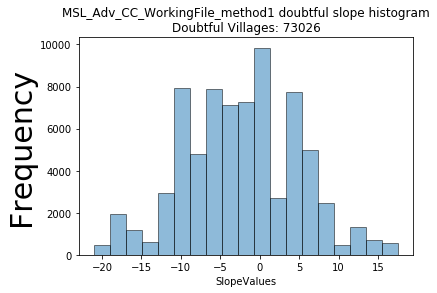

<Figure size 432x288 with 0 Axes>

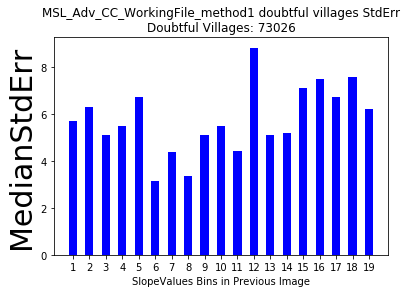

==================== currentCsvFile::  MSW_Adv_CC_WorkingFile_method3.csv ====================
currentIndicatorKey MSW
doubtful villages in Dictionary 62154
doubtfulVillagesDf.shape (62154, 11)
========== Info ==========
Total Villages:  62154
Positive Slope:  25990
Negative Slope:  33460
No Change, Zero Slope:  2704
percentageOfNegativeSlopePointsOverall :  24.78940856590382 %
max Slope value is : 20.44343388672113
min Slope value is : -20.50864285731316


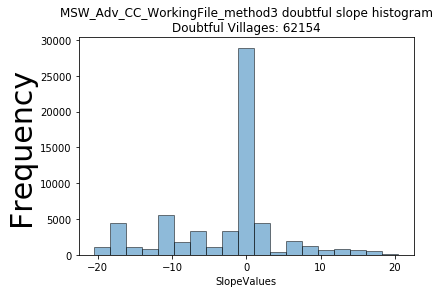

<Figure size 432x288 with 0 Axes>

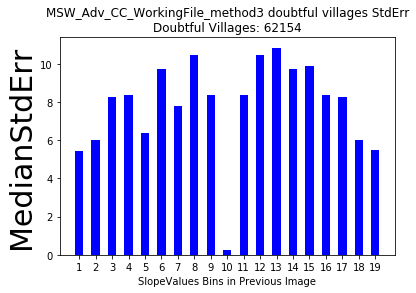

==================== currentCsvFile::  BF_Int_CC_WorkingFile_method3.csv ====================
currentIndicatorKey BF
doubtful villages in Dictionary 33514
doubtfulVillagesDf.shape (33514, 11)
========== Info ==========
Total Villages:  33514
Positive Slope:  11055
Negative Slope:  21976
No Change, Zero Slope:  483
percentageOfNegativeSlopePointsOverall :  16.28129236832942 %
max Slope value is : 13.680679846587546
min Slope value is : -13.726295862613044


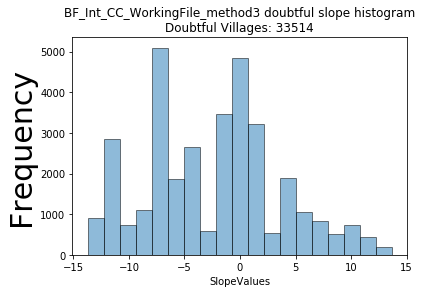

<Figure size 432x288 with 0 Axes>

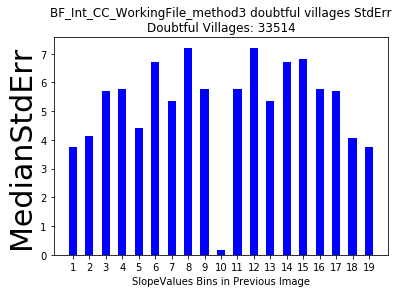

==================== currentCsvFile::  FC_Adv_CC_WorkingFile_method1.csv ====================
currentIndicatorKey FC
doubtful villages in Dictionary 38170
doubtfulVillagesDf.shape (38170, 11)
========== Info ==========
Total Villages:  38170
Positive Slope:  15368
Negative Slope:  21365
No Change, Zero Slope:  1437
percentageOfNegativeSlopePointsOverall :  15.82862265422998 %
max Slope value is : 13.906180442018972
min Slope value is : -13.919575562197911


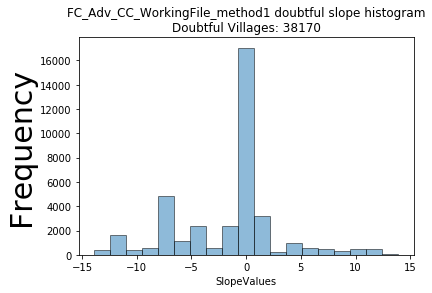

<Figure size 432x288 with 0 Axes>

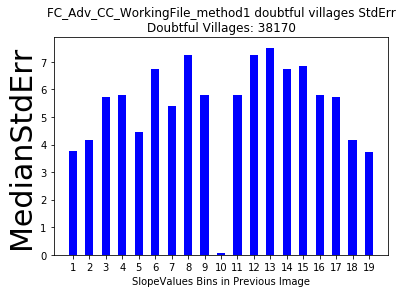

==================== currentCsvFile::  MSW_Int_CC_WorkingFile_method3.csv ====================
currentIndicatorKey MSW
doubtful villages in Dictionary 62154
doubtfulVillagesDf.shape (62154, 11)
========== Info ==========
Total Villages:  62154
Positive Slope:  32393
Negative Slope:  27007
No Change, Zero Slope:  2754
percentageOfNegativeSlopePointsOverall :  20.008594056765226 %
max Slope value is : 20.42876908376235
min Slope value is : -20.226173432013265


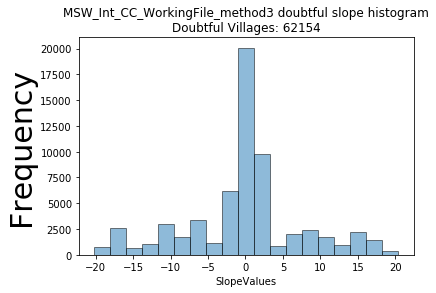

<Figure size 432x288 with 0 Axes>

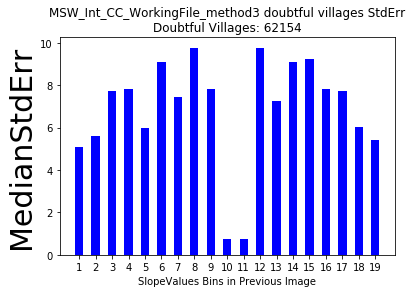

==================== currentCsvFile::  FC_Rud_CC_WorkingFile_method3.csv ====================
currentIndicatorKey FC
doubtful villages in Dictionary 38170
doubtfulVillagesDf.shape (38170, 11)
========== Info ==========
Total Villages:  38170
Positive Slope:  20356
Negative Slope:  16784
No Change, Zero Slope:  1030
percentageOfNegativeSlopePointsOverall :  12.434711098927966 %
max Slope value is : 18.365756714110148
min Slope value is : -17.842920783655774


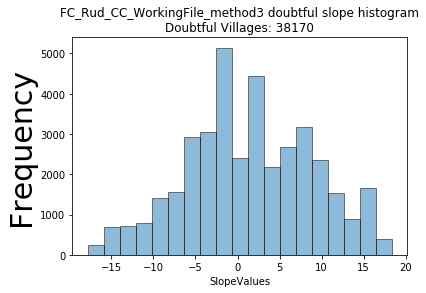

<Figure size 432x288 with 0 Axes>

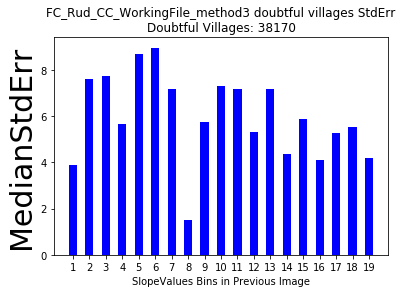

==================== currentCsvFile::  BF_Int_CC_WorkingFile_method1.csv ====================
currentIndicatorKey BF
doubtful villages in Dictionary 33514
doubtfulVillagesDf.shape (33514, 11)
========== Info ==========
Total Villages:  33514
Positive Slope:  10229
Negative Slope:  22282
No Change, Zero Slope:  1003
percentageOfNegativeSlopePointsOverall :  16.5079976588604 %
max Slope value is : 14.725601754804828
min Slope value is : -14.790792506888865


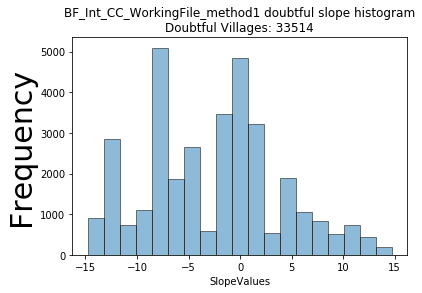

<Figure size 432x288 with 0 Axes>

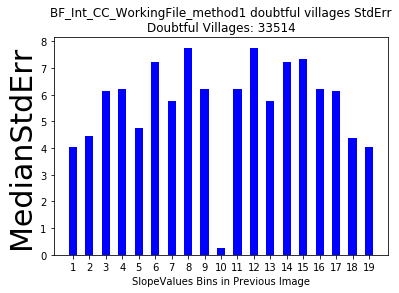

==================== currentCsvFile::  EMP_AL_CC_WorkingFile_method3.csv ====================
currentIndicatorKey EMP
doubtful villages in Dictionary 50944
doubtfulVillagesDf.shape (50944, 11)
========== Info ==========
Total Villages:  50944
Positive Slope:  22243
Negative Slope:  27351
No Change, Zero Slope:  1350
percentageOfNegativeSlopePointsOverall :  20.4970061226478 %
max Slope value is : 8.235001928104507
min Slope value is : -8.037908570445067


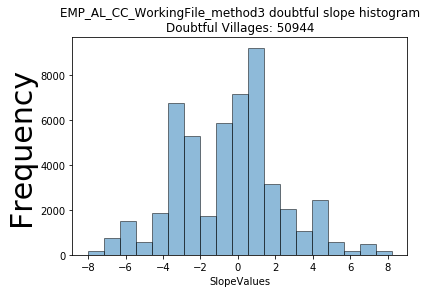

<Figure size 432x288 with 0 Axes>

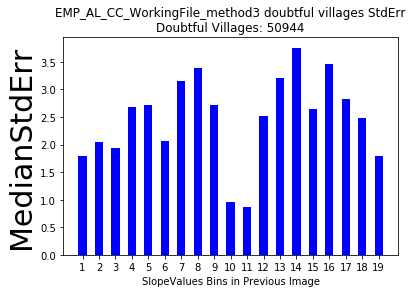

==================== currentCsvFile::  MSW_Rud_CC_WorkingFile_method1.csv ====================
currentIndicatorKey MSW
doubtful villages in Dictionary 62154
doubtfulVillagesDf.shape (62154, 11)
========== Info ==========
Total Villages:  62154
Positive Slope:  38411
Negative Slope:  22949
No Change, Zero Slope:  794
percentageOfNegativeSlopePointsOverall :  17.002155922860933 %
max Slope value is : 18.979393951389568
min Slope value is : -18.68443119714085


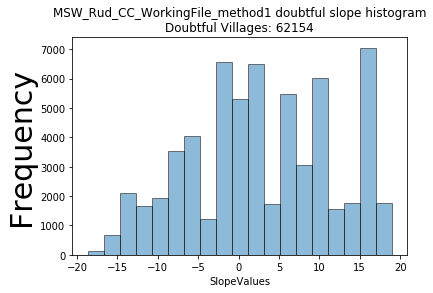

<Figure size 432x288 with 0 Axes>

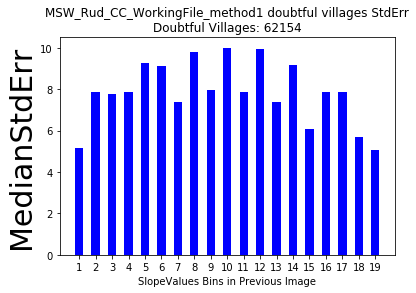

==================== currentCsvFile::  MSL_Adv_CC_WorkingFile_method3.csv ====================
currentIndicatorKey MSL
doubtful villages in Dictionary 73026
doubtfulVillagesDf.shape (73026, 10)
========== Info ==========
Total Villages:  73026
Positive Slope:  28735
Negative Slope:  43201
No Change, Zero Slope:  1090
percentageOfNegativeSlopePointsOverall :  32.00619364780666 %
max Slope value is : 17.39357469834353
min Slope value is : -20.763714573232697


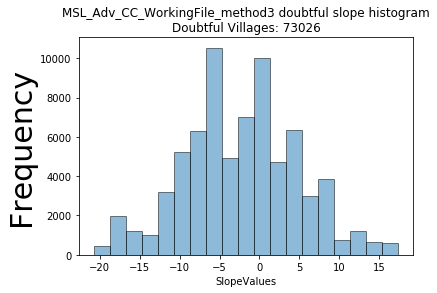

<Figure size 432x288 with 0 Axes>

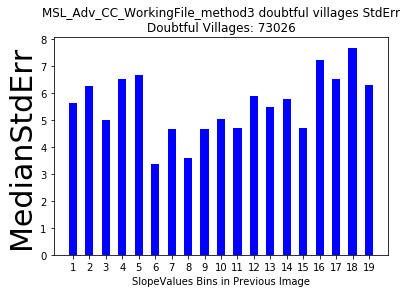

==================== currentCsvFile::  FC_Rud_CC_WorkingFile_method1.csv ====================
currentIndicatorKey FC
doubtful villages in Dictionary 38170
doubtfulVillagesDf.shape (38170, 11)
========== Info ==========
Total Villages:  38170
Positive Slope:  20369
Negative Slope:  16771
No Change, Zero Slope:  1030
percentageOfNegativeSlopePointsOverall :  12.425079828415212 %
max Slope value is : 18.514683479573176
min Slope value is : -18.124452356161083


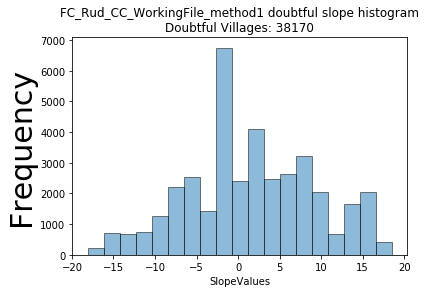

<Figure size 432x288 with 0 Axes>

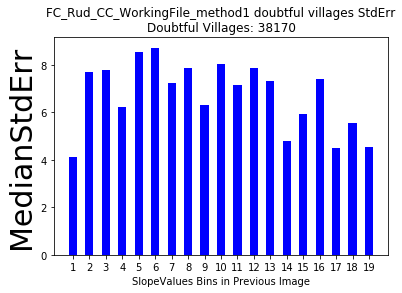

==================== currentCsvFile::  EMP_AL_CC_WorkingFile_method1.csv ====================
currentIndicatorKey EMP
doubtful villages in Dictionary 50944
doubtfulVillagesDf.shape (50944, 11)
========== Info ==========
Total Villages:  50944
Positive Slope:  22277
Negative Slope:  27508
No Change, Zero Slope:  1159
percentageOfNegativeSlopePointsOverall :  20.614662879667865 %
max Slope value is : 8.415959870210031
min Slope value is : -8.182814170850305


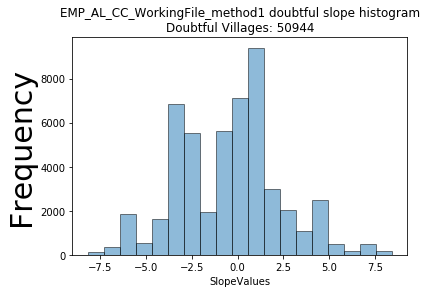

<Figure size 432x288 with 0 Axes>

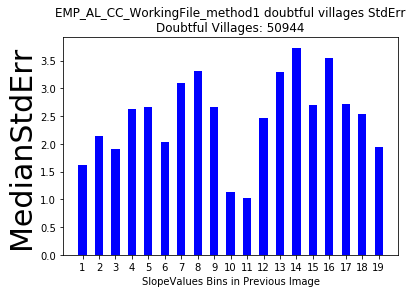

==================== currentCsvFile::  FC_Int_CC_WorkingFile_method3.csv ====================
currentIndicatorKey FC
doubtful villages in Dictionary 38170
doubtfulVillagesDf.shape (38170, 11)
========== Info ==========
Total Villages:  38170
Positive Slope:  16764
Negative Slope:  20190
No Change, Zero Slope:  1216
percentageOfNegativeSlopePointsOverall :  14.958103973269521 %
max Slope value is : 18.451010468825928
min Slope value is : -18.58753666639975


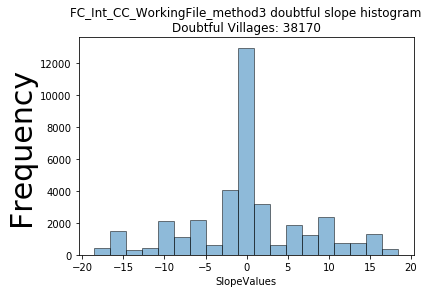

<Figure size 432x288 with 0 Axes>

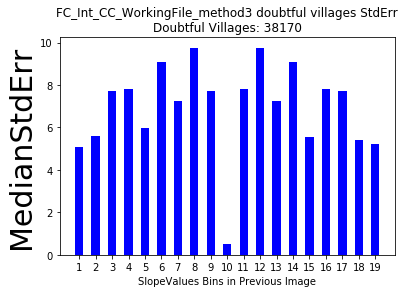

==================== currentCsvFile::  MSW_Rud_CC_WorkingFile_method3.csv ====================
currentIndicatorKey MSW
doubtful villages in Dictionary 62154
doubtfulVillagesDf.shape (62154, 11)
========== Info ==========
Total Villages:  62154
Positive Slope:  37551
Negative Slope:  23088
No Change, Zero Slope:  1515
percentageOfNegativeSlopePointsOverall :  17.105136430651147 %
max Slope value is : 18.098283137005176
min Slope value is : -18.027267499875133


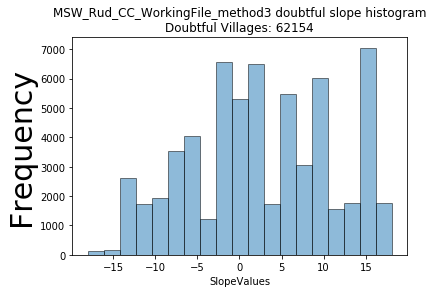

<Figure size 432x288 with 0 Axes>

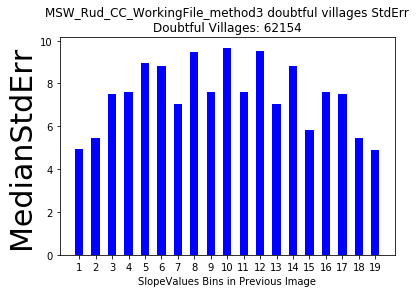

==================== currentCsvFile::  EMP_NAL_CC_WorkingFile_method1.csv ====================
currentIndicatorKey EMP
doubtful villages in Dictionary 50944
doubtfulVillagesDf.shape (50944, 11)
========== Info ==========
Total Villages:  50944
Positive Slope:  26714
Negative Slope:  23081
No Change, Zero Slope:  1149
percentageOfNegativeSlopePointsOverall :  17.297042094140394 %
max Slope value is : 5.980873723809112
min Slope value is : -6.010873978356696


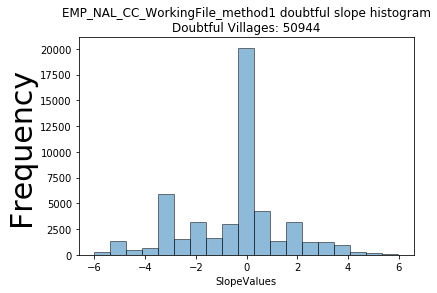

<Figure size 432x288 with 0 Axes>

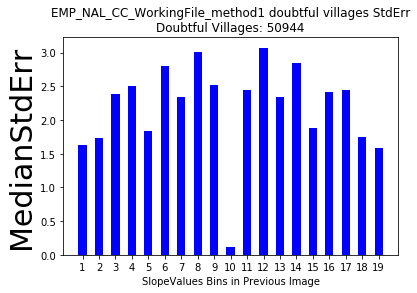

==================== currentCsvFile::  EMP_UN_CC_WorkingFile_method1.csv ====================
currentIndicatorKey EMP
doubtful villages in Dictionary 50944
doubtfulVillagesDf.shape (50944, 11)
========== Info ==========
Total Villages:  50944
Positive Slope:  30863
Negative Slope:  17770
No Change, Zero Slope:  2311
percentageOfNegativeSlopePointsOverall :  13.316946320041367 %
max Slope value is : 6.170702397470341
min Slope value is : -5.992197759625517


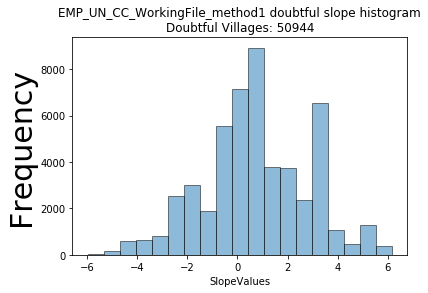

<Figure size 432x288 with 0 Axes>

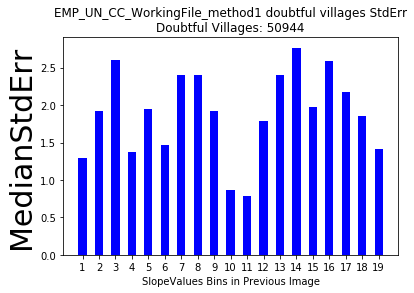

==================== currentCsvFile::  BF_Adv_CC_WorkingFile_method1.csv ====================
currentIndicatorKey BF
doubtful villages in Dictionary 33514
doubtfulVillagesDf.shape (33514, 11)
========== Info ==========
Total Villages:  33514
Positive Slope:  10520
Negative Slope:  21794
No Change, Zero Slope:  1200
percentageOfNegativeSlopePointsOverall :  16.146454581150863 %
max Slope value is : 14.28031092801121
min Slope value is : -14.578574004552141


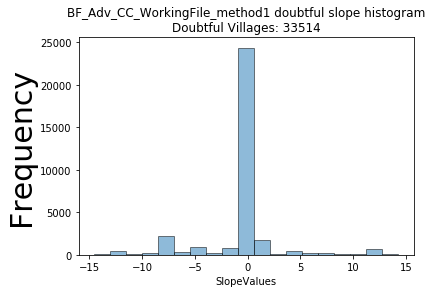

<Figure size 432x288 with 0 Axes>

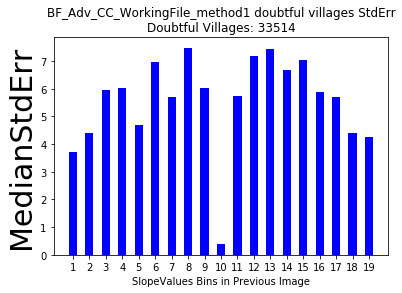

==================== currentCsvFile::  MSL_Int_CC_WorkingFile_method1.csv ====================
currentIndicatorKey MSL
doubtful villages in Dictionary 73026
doubtfulVillagesDf.shape (73026, 10)
========== Info ==========
Total Villages:  73026
Positive Slope:  42630
Negative Slope:  28792
No Change, Zero Slope:  1604
percentageOfNegativeSlopePointsOverall :  21.331041584862607 %
max Slope value is : 21.154417417672267
min Slope value is : -17.68591762450644


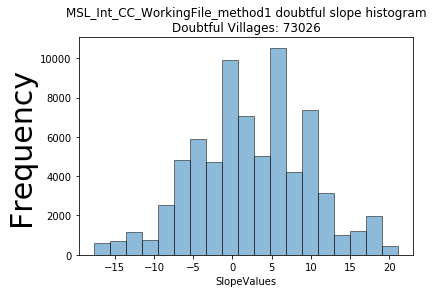

<Figure size 432x288 with 0 Axes>

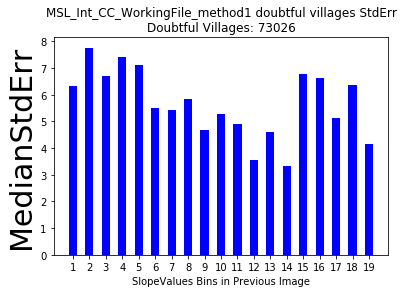

==================== currentCsvFile::  MSL_Int_CC_WorkingFile_method3.csv ====================
currentIndicatorKey MSL
doubtful villages in Dictionary 73026
doubtfulVillagesDf.shape (73026, 10)
========== Info ==========
Total Villages:  73026
Positive Slope:  42981
Negative Slope:  28397
No Change, Zero Slope:  1648
percentageOfNegativeSlopePointsOverall :  21.038399134667387 %
max Slope value is : 21.017007873228984
min Slope value is : -17.649417181930946


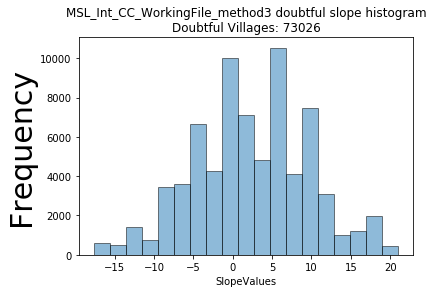

<Figure size 432x288 with 0 Axes>

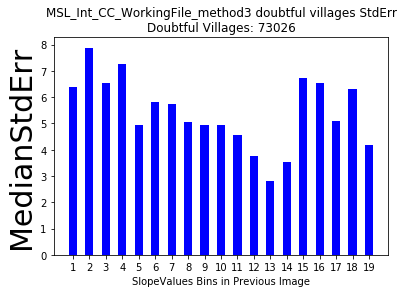

==================== currentCsvFile::  MSW_Int_CC_WorkingFile_method1.csv ====================
currentIndicatorKey MSW
doubtful villages in Dictionary 62154
doubtfulVillagesDf.shape (62154, 11)
========== Info ==========
Total Villages:  62154
Positive Slope:  32419
Negative Slope:  27439
No Change, Zero Slope:  2296
percentageOfNegativeSlopePointsOverall :  20.32864858457367 %
max Slope value is : 19.904250909316616
min Slope value is : -19.78014041653976


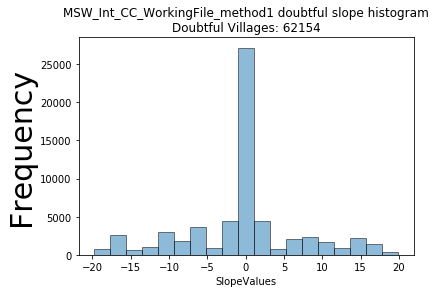

<Figure size 432x288 with 0 Axes>

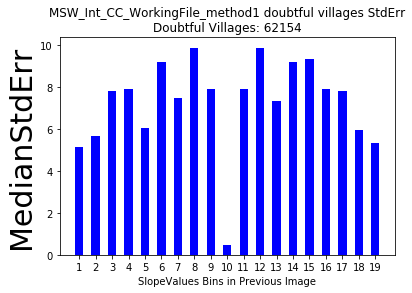

==================== currentCsvFile::  BF_Rud_CC_WorkingFile_method3.csv ====================
currentIndicatorKey BF
doubtful villages in Dictionary 33514
doubtfulVillagesDf.shape (33514, 11)
========== Info ==========
Total Villages:  33514
Positive Slope:  21377
Negative Slope:  11134
No Change, Zero Slope:  1003
percentageOfNegativeSlopePointsOverall :  8.248812760692562 %
max Slope value is : 13.698067410838656
min Slope value is : -13.691415058620876


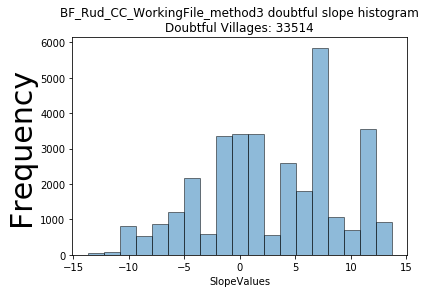

<Figure size 432x288 with 0 Axes>

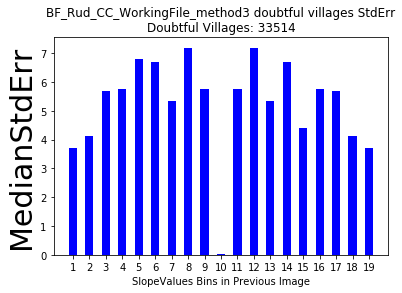

In [7]:
dominantLabelReplacedFolder = 'csvFiles/labelsReplacedByDominantValue/'
filesDominantLabelReplacedFolder = [f for f in listdir(dominantLabelReplacedFolder) if (isfile(join(dominantLabelReplacedFolder, f)) and f.endswith('.csv')) ]


for currentCsvFile in filesDominantLabelReplacedFolder:
    #currentCsvFile = filesDominantLabelReplacedFolder[0]
    print('='*20,'currentCsvFile:: ',currentCsvFile,'='*20)
    currentCsvFileAbsolutePath = dominantLabelReplacedFolder + currentCsvFile
    underscoreStartIndex = currentCsvFile.find('_')
    currentIndicatorKey = currentCsvFile[:underscoreStartIndex].upper()
    print('currentIndicatorKey',currentIndicatorKey)
    currentDoubtfulVillagesList = doubtfulVillagesDictionary[currentIndicatorKey]
    print('doubtful villages in Dictionary',len(currentDoubtfulVillagesList))


    currentCsvFileContent = pd.read_csv(currentCsvFileAbsolutePath)
    doubtfulVillagesDf = currentCsvFileContent[currentCsvFileContent['Town/Village'].isin(currentDoubtfulVillagesList)]
    print('doubtfulVillagesDf.shape',doubtfulVillagesDf.shape)

    # print(doubtfulVillagesDf.head())

    columnsPrediction=['predicted_2001','predicted_2003','predicted_2005','predicted_2007','predicted_2009','predicted_2011']
    subsetPredictionData=doubtfulVillagesDf[columnsPrediction]

    axisvalues=list(range(1,len(subsetPredictionData.columns)+1))
    def calc_slope(row):
        a = scipy.stats.linregress(axisvalues, y=row)
        return pd.Series(a._asdict())


    regressionData= (subsetPredictionData.apply(calc_slope,axis=1))
    regressedDf=pd.concat([doubtfulVillagesDf, regressionData], axis=1)
    regressedDf.to_csv(currentCsvFileAbsolutePath[:-4]+'_DoubtfulCasesRegressedData.tsv',sep='\t',index=False)

    print('='*10,'Info','='*10)
    # regressedDf.head()
    print('Total Villages: ',str(regressedDf['slope'].shape[0]))
    print('Positive Slope: ',str(np.sum(regressedDf['slope']>0)))
    negativeSlopePoints = np.sum(regressedDf['slope']<0)
    print('Negative Slope: ',str(negativeSlopePoints))
    print('No Change, Zero Slope: ',str(np.sum(regressedDf['slope']==0.0)))
    print('percentageOfNegativeSlopePointsOverall : ', (negativeSlopePoints/currentCsvFileContent.shape[0])*100.0 ,'%')

    tempArray = (regressedDf['slope'].values)
    print('max Slope value is :',(np.amax(tempArray)))
    print('min Slope value is :',np.amin(tempArray))


    bins = np.linspace(np.amin(tempArray),np.amax(tempArray), 20)
    plt.clf()
    plt.title(currentCsvFile[:-4]+' doubtful slope histogram\n'+
             'Doubtful Villages: ' + str(regressedDf['slope'].shape[0]))
    plt.xlabel('SlopeValues')
    plt.ylabel('Frequency',fontsize=30)
    plt.hist(tempArray, bins, alpha=0.5, histtype='bar', ec='black')
    # plt.legend(loc='upper right',fontsize=30)
    plt.xticks(fontsize = 10) 
    # plt.yticks(fontsize = 20) 
    plt.show()

    medianStdErrList=[]
    stderr_vec=regressedDf['stderr'].values
    slope_vec=regressedDf['slope'].values
    for numIter in range(len(bins)-1):
        currSlopeMask= [(slope_vec<bins[numIter+1]) & (slope_vec>=bins[numIter])]
        curr_stderr_vec=stderr_vec[currSlopeMask]
        medianStdErrList.append(np.median(curr_stderr_vec))

    x= bins[:-1]
    y= medianStdErrList
    plt.clf()
    ticks = np.arange(1,len(y)+1,1) # can replace 9 with len(y) to be a more general solution
    fig, ax = plt.subplots()
    width = 0.5
    ax.set_xticks(ticks)
    # ax.set_xticklabels(x)
    plt.xlabel('SlopeValues Bins in Previous Image')
    plt.ylabel('MedianStdErr',fontsize=30)
    ax.bar(ticks, y, width, color='Blue')
    plt.title(currentCsvFile[:-4]+' doubtful villages StdErr\n'+
             'Doubtful Villages: ' + str(regressedDf['slope'].shape[0]))
    plt.xticks(fontsize = 10) 
    plt.show()

## Examples of Doubtful villages with zero slope can be seen here

In [8]:
regressedDf[regressedDf['slope']==0.0]

,Town/Village,actual_2011,predicted_2001,predicted_2003,predicted_2005,predicted_2007,predicted_2009,predicted_2011,BF_RUD,BF_INT,BF_ADV,slope,intercept,rvalue,pvalue,stderr
75,422932,0,87.905930,87.905930,34.635668,34.635668,87.905930,87.905930,100.0,0.0,0.0,0.0,70.149176,0.0,1.0,7.351995
511,531185,0,87.905930,87.905930,34.635668,34.635668,87.905930,87.905930,79.3,5.5,14.6,0.0,70.149176,0.0,1.0,7.351995
718,421954,0,87.905930,87.905930,34.635668,34.635668,87.905930,87.905930,100.0,0.0,0.0,0.0,70.149176,0.0,1.0,7.351995
733,221225,0,34.868501,34.868501,87.905930,87.905930,34.868501,34.868501,95.1,0.0,4.6,0.0,52.547644,0.0,1.0,7.319861
734,243428,0,87.905930,87.905930,34.635668,34.635668,87.905930,87.905930,90.0,0.0,10.0,0.0,70.149176,0.0,1.0,7.351995
766,421846,0,87.905930,87.905930,34.635668,34.635668,87.905930,87.905930,100.0,0.0,0.0,0.0,70.149176,0.0,1.0,7.351995
767,388678,1,87.905930,87.905930,34.635668,34.635668,87.905930,87.905930,51.9,35.7,12.3,0.0,70.149176,0.0,1.0,7.351995
1125,546347,0,87.905930,87.905930,34.635668,34.635668,87.905930,87.905930,98.9,0.0,1.1,0.0,70.149176,0.0,1.0,7.351995
1625,551697,2,87.905930,87.905930,34.635668,34.635668,87.905930,87.905930,16.8,18.2,64.7,0.0,70.149176,0.0,1.0,7.351995
1627,544423,1,87.905930,87.905930,34.635668,34.635668,87.905930,87.905930,54.5,45.5,0.0,0.0,70.149176,0.0,1.0,7.351995
